<a href="https://colab.research.google.com/github/userlinklearner/Pyhton-Projects/blob/main/T13_DeepLearning_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">T13 Deeplearning </font></h1>
<hr>

## **Case**: Steel Plates Fault

http://archive.ics.uci.edu/ml/datasets/steel+plates+faults

Dataset:

https://meusite.mackenzie.br/rogerio/STEEL_faults.csv

Um conjunto de dados de falhas em placas de aço, classificadas em 7 tipos diferentes. O objetivo é treinar um modelo deep learning para o reconhecimento automático de padrões.


Data Set Information:

Type of dependent variables (7 Types of Steel Plates Faults):

1.Pastry

2.Z_Scratch

3.K_Scatch

4.Stains

5.Dirtiness

6.Bumps

7.Other_Faults



# imports


In [ ]:
# imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

# Exercício. Acesse e Explore os Dados

Que transformações são necessárias para o treinamento dos dados?

In [ ]:
# Seu código
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/STEEL_faults.csv')
df.head()



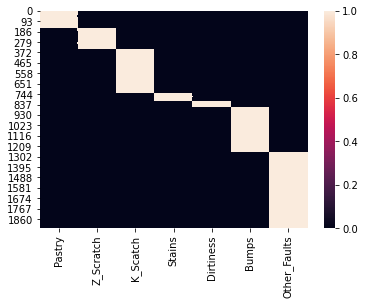

In [ ]:

import seaborn as sns

sns.heatmap( df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']])

plt.show()

In [ ]:
print(df.isnull().sum())

In [ ]:
df.dtypes

In [ ]:
df.shape

(1941, 34)

# Exercício. Prepare os Dados de Entrada `X`

Não é necessário tratamento de dados nulos. A normalização das entradas, entretanto, é necessária. Depois de fazer o a seleção dos atributos de `X` ( `X = df[['col1', 'col2', ... ]]` ), faça o `scale` dos dados. Empregue o `df.columns` para ajudar a obter o nome das colunas. 

In [ ]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [ ]:
# Seu código
X = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

from sklearn.preprocessing import scale, normalize

X = scale(X)

In [ ]:
pd.DataFrame(X, columns=df.columns[0:27])

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,1.576303,1.223956,-1.223956,0.022920,-0.940864,-1.258531,-1.435364,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,1.576303,1.223956,-1.223956,0.022920,1.445043,-0.254349,-1.342740,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,1.133521,1.223956,-1.223956,0.386082,2.133548,-0.521791,-0.876299,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,-0.734467,-0.817023,0.817023,3.836121,1.324897,0.197460,-1.532047,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,-0.734467,-0.817023,0.817023,1.929520,-0.875117,0.250657,-1.861950,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.618830,-0.685357,-0.746795,-0.746811,-0.313690,-0.192126,-0.142987,-0.334424,1.072381,0.578304,-0.686037,-0.817023,0.817023,-0.703404,0.115090,-0.172003,0.002335,-0.216488,-0.378385,-0.367922,-1.193905,-0.071239,0.231603,-0.438483,-1.022264,0.900332,0.412476
1937,-0.820537,-0.890382,-0.738452,-0.738468,-0.310981,-0.225334,-0.138297,-0.335271,0.854489,0.150180,-0.686037,-0.817023,0.817023,-0.703404,-0.400205,0.300210,-0.082539,-0.179166,0.386784,-0.449045,-1.193905,-0.043727,0.323402,-0.380362,-1.068196,0.491534,0.683276
1938,-0.818616,-0.892392,-0.712412,-0.712430,-0.310013,-0.238617,-0.142987,-0.329467,1.103509,0.524788,-0.686037,-0.817023,0.817023,-0.703404,-0.395533,-0.623084,-0.197673,-0.204613,0.470661,-0.562189,-1.193905,-0.034218,0.263172,-0.500126,-1.130504,0.917814,0.360909
1939,-0.833984,-0.900432,-0.692280,-0.692288,-0.285435,-0.049331,-0.084353,-0.299900,1.010126,0.524788,-0.686037,-0.817023,0.817023,-0.703404,-0.434580,1.283988,1.360326,-0.153719,-1.111484,-0.656975,-1.193905,0.164584,0.379686,0.194019,-0.287351,0.767876,1.197767


# Exercício. Prepare a saída `y`

Lembre-se no `Keras`/`TensorFlow` há uma saída binária para cada classe.

In [ ]:
# Seu código
y = df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']]


In [ ]:
y.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


# Exercício. Separe os dados de Treinamento e Teste

Empregue o scikit-learn para separar os dados de treinamento e teste. Empregue 0.3 de dados de teste e o `seed=1984` para geração dos dados. 

In [ ]:
# Seu código

from sklearn.model_selection import train_test_split

seed = 1984 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)


# Exercício. Faça o Treinamento do Modelo Deep Learning

Empregue o modelo de código da aula de Teoria para completar o código abaixo e treine o Modelo Neural. Você vai configurar uma única camada oculta de 16 neurônios e função de ativação sigmoid.

In [ ]:
from numpy.random import seed  # para garantir a reprodutibilidade dos resultados
seed(1984)
tf.random.set_seed(1984)

# camada de entrada 
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

# entre aqui com uma camada oculta de 16 neurônios e função de ativação sigmoid
model.add(layers.Dense(16, activation='sigmoid'))

# entre aqui com a camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# entre aqui com a compilação do modelo com as métricas e métodos empregadas em teoria 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entre aqui com o treinamento do modelo com 0.2 dos dados para validação e 100 iterações de treinamento
history = model.fit(X, y, validation_split=0.2, epochs=100)

Epoch 1/100
49/49 [==============================] - 1s 12ms/step - loss: 1.9257 - accuracy: 0.2519 - val_loss: 1.7055 - val_accuracy: 0.0000e+00
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 1.7539 - accuracy: 0.2498 - val_loss: 1.7169 - val_accuracy: 0.0000e+00
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: 1.6321 - accuracy: 0.3976 - val_loss: 1.7000 - val_accuracy: 0.0000e+00
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 1.5179 - accuracy: 0.4516 - val_loss: 1.6793 - val_accuracy: 0.0180
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: 1.4228 - accuracy: 0.4848 - val_loss: 1.6393 - val_accuracy: 0.0746
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: 1.3688 - accuracy: 0.4896 - val_loss: 1.6050 - val_accuracy: 0.1131
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 1.2839 - accuracy: 0.5296 - val_loss: 1.6088 - val_accuracy: 0.1183


# Exercício. Visualize o modelo

Empregue o comando `model.summary()` para exibir o modelo. O código a seguir exibe graficamente a rede criada.

\* nota: o símbolo ? aparece na figura é empregado para outros modelos de rede.  

In [ ]:
# Seu código
model.summary() 



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 27)                756       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 119       
Total params: 1,323
Trainable params: 1,323
Non-trainable params: 0
_________________________________________________________________


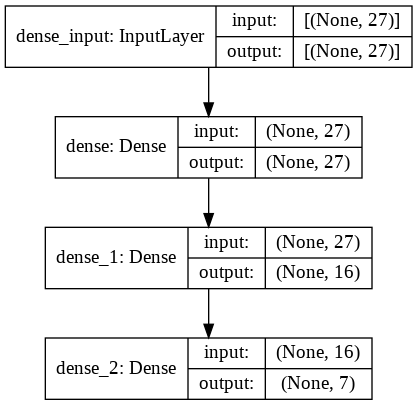

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Exercício. Analise o Treinamento da Rede

Empregue a função `plot_loss_acc` abaixo (veja a sintaxe da chamada na teoria) para analisar o treinamento da rede. 

In [ ]:
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc


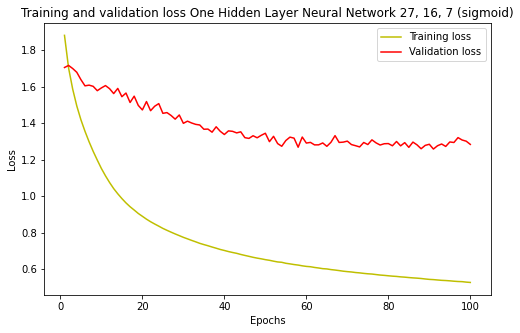

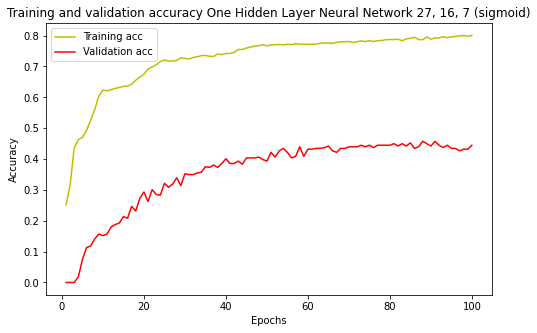

One Hidden Layer Neural Network 27, 16, 7 (sigmoid)Accuracy Train: 80.09 %, Accuracy Test: 44.47 %


In [ ]:
# Seu código
loss, val_loss, acc, val_acc = plot_loss_acc(history,'One Hidden Layer Neural Network 27, 16, 7 (sigmoid)')


# Exercício. Reduzindo o *Overfitting* (**RESOLVIDO**)

O *overfitting* ou sobreajuste é uma acuracidade excessiva do modelo no conjunto de treinamento. Isso pode levar a modelos pouco generalizados e, depois de outras métricas de acuracidade, é uma métrica que deve ser analisada para a qualidade do modelo.

Aqui empregaremos uma técnica chamada `drop out`. 

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 1.8982 - accuracy: 0.2369 - val_loss: 1.7212 - val_accuracy: 0.3603
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7423 - accuracy: 0.3427 - val_loss: 1.6221 - val_accuracy: 0.3603
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6456 - accuracy: 0.3593 - val_loss: 1.5573 - val_accuracy: 0.3676
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5891 - accuracy: 0.3914 - val_loss: 1.5050 - val_accuracy: 0.5110
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5670 - accuracy: 0.4478 - val_loss: 1.4565 - val_accuracy: 0.5331
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4884 - accuracy: 0.5045 - val_loss: 1.4103 - val_accuracy: 0.5294
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4894 - accuracy: 0.4607 - val_loss: 1.3684 - val_accuracy: 0.5368
Epoch 8/100
3

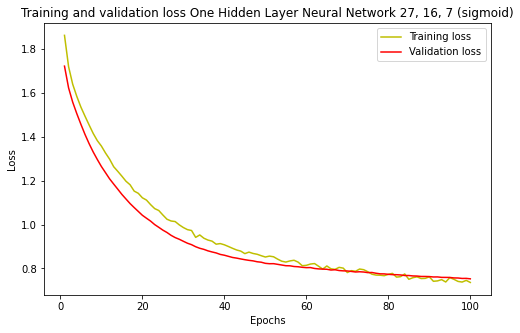

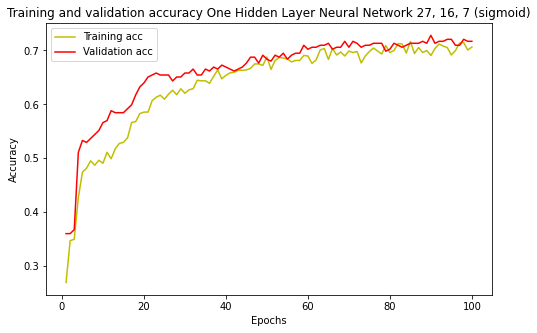

One Hidden Layer Neural Network 27, 16, 7 (sigmoid)Accuracy Train: 70.63 %, Accuracy Test: 71.69 %


In [ ]:
all_results = [] 
from keras.layers import Dropout

from numpy.random import seed
seed(1984)
tf.random.set_seed(1984)


model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 
model.add(Dropout(0.20))

model.add(layers.Dense(16, activation='sigmoid'))

model.add(layers.Dense(7, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

loss, val_loss, acc, val_acc = plot_loss_acc(history,'One Hidden Layer Neural Network 27, 16, 7 (sigmoid)')


# Exercício. Fazendo a Predição dos dados de Teste

Faça a predição dos casos de teste e analise os resultados empregando o `classification_report` do `scikit-learn`.

Lembre-se, cada neurônio de saída da rede retorna a probabilidade de uma das 7 classes. A seleção do neurônio com maior probabilidade retorna a classe mais provável (empregue o comando `np.argmax()`).

Veja a saída:

In [ ]:
model.predict(X_test)

array([[1.17582053e-01, 9.63451385e-01, 2.53015161e-02, ...,
        2.78403163e-02, 4.72322404e-01, 5.97302675e-01],
       [3.56518477e-01, 5.72768450e-02, 2.72044539e-03, ...,
        2.38608450e-01, 8.64025533e-01, 7.73187339e-01],
       [8.26584101e-02, 8.01907182e-02, 9.95062828e-01, ...,
        9.06825066e-04, 2.11065412e-01, 6.06372714e-01],
       ...,
       [1.17328495e-01, 6.52189255e-02, 9.93567824e-01, ...,
        1.33103132e-03, 2.10232079e-01, 6.60340071e-01],
       [1.04505986e-01, 7.60157704e-02, 9.94019210e-01, ...,
        1.12614036e-03, 2.04615593e-01, 6.44700348e-01],
       [2.47394085e-01, 6.04160130e-02, 1.18169785e-02, ...,
        6.42699003e-02, 8.76000166e-01, 7.47501493e-01]], dtype=float32)

In [ ]:
# Seu código
model.predict(X_test)
np.argmax(model.predict(X_test), axis=-1)

array([1, 5, 2, 6, 6, 6, 2, 6, 6, 2, 6, 6, 2, 1, 5, 2, 6, 0, 5, 1, 6, 1,
       2, 0, 2, 6, 6, 6, 6, 6, 2, 2, 6, 5, 6, 2, 6, 6, 2, 0, 6, 6, 0, 0,
       6, 6, 0, 6, 1, 6, 2, 6, 6, 6, 3, 0, 2, 1, 6, 6, 6, 5, 2, 6, 6, 2,
       6, 6, 6, 6, 6, 2, 1, 1, 1, 3, 0, 6, 0, 5, 6, 6, 1, 1, 5, 2, 5, 6,
       2, 6, 2, 2, 5, 6, 6, 5, 2, 5, 5, 2, 6, 1, 6, 0, 6, 6, 6, 6, 1, 1,
       2, 6, 1, 6, 6, 6, 0, 2, 5, 6, 5, 2, 5, 2, 5, 6, 6, 6, 1, 1, 5, 6,
       5, 2, 2, 2, 6, 5, 0, 6, 2, 1, 6, 6, 5, 5, 2, 2, 2, 6, 2, 6, 1, 6,
       6, 6, 6, 6, 6, 2, 3, 5, 6, 2, 6, 6, 5, 2, 2, 6, 6, 6, 5, 5, 5, 1,
       5, 2, 6, 6, 6, 5, 6, 6, 2, 6, 3, 1, 0, 1, 6, 6, 6, 5, 6, 6, 3, 6,
       6, 5, 2, 2, 5, 3, 6, 3, 0, 6, 6, 0, 6, 2, 2, 6, 3, 2, 1, 2, 6, 6,
       2, 2, 6, 6, 2, 6, 6, 2, 6, 5, 5, 3, 5, 2, 5, 2, 6, 6, 0, 5, 6, 6,
       6, 1, 6, 6, 2, 5, 5, 2, 5, 6, 5, 6, 2, 6, 6, 6, 5, 2, 2, 6, 6, 6,
       6, 1, 6, 6, 6, 6, 6, 1, 2, 6, 2, 6, 2, 6, 6, 6, 6, 1, 5, 2, 5, 5,
       5, 6, 1, 5, 0, 3, 6, 1, 6, 5, 2, 1, 1, 2, 1,

# Exercício. Faça o Treinamento de outros Modelos

Faça o treinamento de outras configurações até obter uma acuracidade do conjunto de validação superior a 0.74 (primeiro modelo) e discuta seus resultados.  

Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 1.8934 - accuracy: 0.2397 - val_loss: 1.7191 - val_accuracy: 0.3603
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7357 - accuracy: 0.3357 - val_loss: 1.6186 - val_accuracy: 0.3603
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.6344 - accuracy: 0.3522 - val_loss: 1.5511 - val_accuracy: 0.3713
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5754 - accuracy: 0.4058 - val_loss: 1.4956 - val_accuracy: 0.5184
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5506 - accuracy: 0.4699 - val_loss: 1.4436 - val_accuracy: 0.5294
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 1.4644 - accuracy: 0.5176 - val_loss: 1.3950 - val_accuracy: 0.5294
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4662 - accuracy: 0.4629 - val_loss: 1.3510 - val_accuracy: 0.5404
Epoch 8/100
3

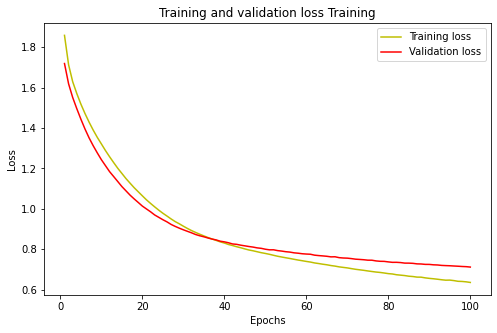

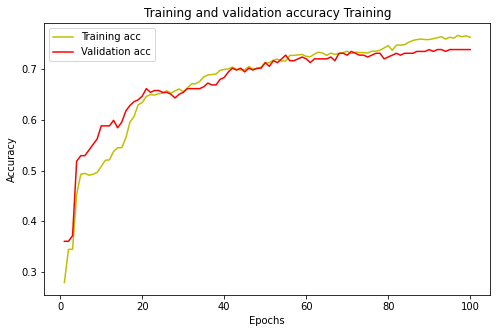

TrainingAccuracy Train: 76.34 %, Accuracy Test: 73.90 %


In [ ]:

# Aqui apenas o modelo original

from numpy.random import seed  # para garantir a reprodutibilidade dos resultados
seed(1984)
tf.random.set_seed(1984)

# camada de entrada 
model = Sequential([layers.Dense(X.shape[1], activation='sigmoid', input_shape=[X.shape[1],])]) 

# entre aqui com uma camada oculta de 16 neurônios e função de ativação sigmoid
model.add(layers.Dense(16, activation='sigmoid'))

# entre aqui com a camada de saída
model.add(layers.Dense(7, activation='sigmoid'))

# entre aqui com a compilação do modelo com as métricas e métodos empregadas em teoria 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# entre aqui com o treinamento do modelo com 0.2 dos dados para validação e 100 iterações de treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

# plot
loss, val_loss, acc, val_acc = plot_loss_acc(history,'Training')
